In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(context='notebook',palette='Spectral',style='darkgrid',font_scale=1.5,color_codes=True)

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [3]:
# Read data file
data = pd.read_csv('train.csv')

In [4]:
data.shape

(1070, 9)

In [5]:
data.sample(n=10)

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
778,334,43,0,35.720,2,0,0,19144.57652,1
159,1227,42,1,37.180,2,0,2,7162.01220,1
515,1166,57,1,40.370,0,0,2,10982.50130,1
520,842,23,0,32.780,2,1,2,36021.01120,1
842,3,33,1,22.705,0,0,1,21984.47061,0
937,1149,42,1,34.100,0,0,3,5979.73100,1
39,1098,52,0,30.875,0,0,0,23045.56616,1
22,52,48,1,28.000,1,1,3,23568.27200,1
150,1037,45,0,30.495,1,1,1,39725.51805,1
283,1170,18,1,27.360,1,1,0,17178.68240,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   age             1070 non-null   int64  
 2   sex             1070 non-null   int64  
 3   bmi             1070 non-null   float64
 4   children        1070 non-null   int64  
 5   smoker          1070 non-null   int64  
 6   region          1070 non-null   int64  
 7   charges         1070 non-null   float64
 8   insuranceclaim  1070 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 75.4 KB


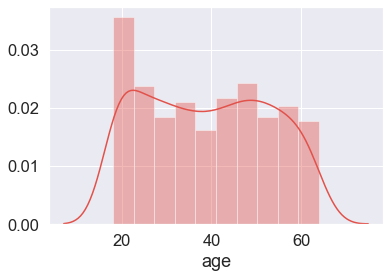

In [7]:
sns.distplot(data['age'])

1.5214637215789732


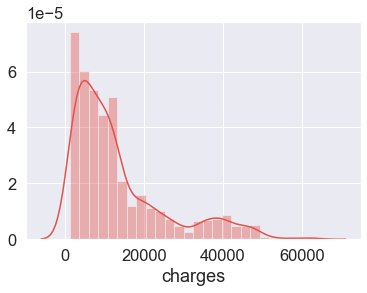

In [8]:
print(data['charges'].skew())
sns.distplot(data['charges'])

-0.07969170803095374


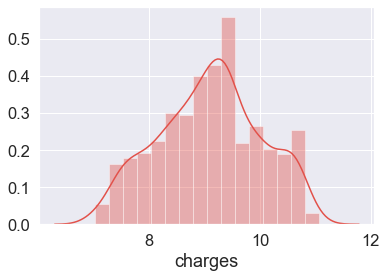

In [9]:
print(np.log(data['charges']).skew())
sns.distplot(np.log(data['charges']))

In [10]:
data['sex'].value_counts()

0    540
1    530
Name: sex, dtype: int64

In [11]:
data['children'].value_counts()

0    444
1    259
2    205
3    125
4     22
5     15
Name: children, dtype: int64

In [12]:
data['smoker'].value_counts()

0    852
1    218
Name: smoker, dtype: int64

In [13]:
data['region'].value_counts()

2    286
3    264
0    261
1    259
Name: region, dtype: int64

In [14]:
data.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

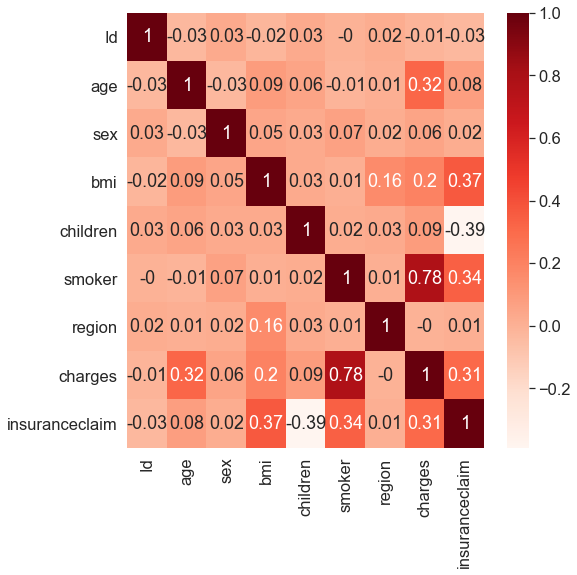

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(np.around(data.corr(),2),annot=True,cmap=plt.cm.Reds)

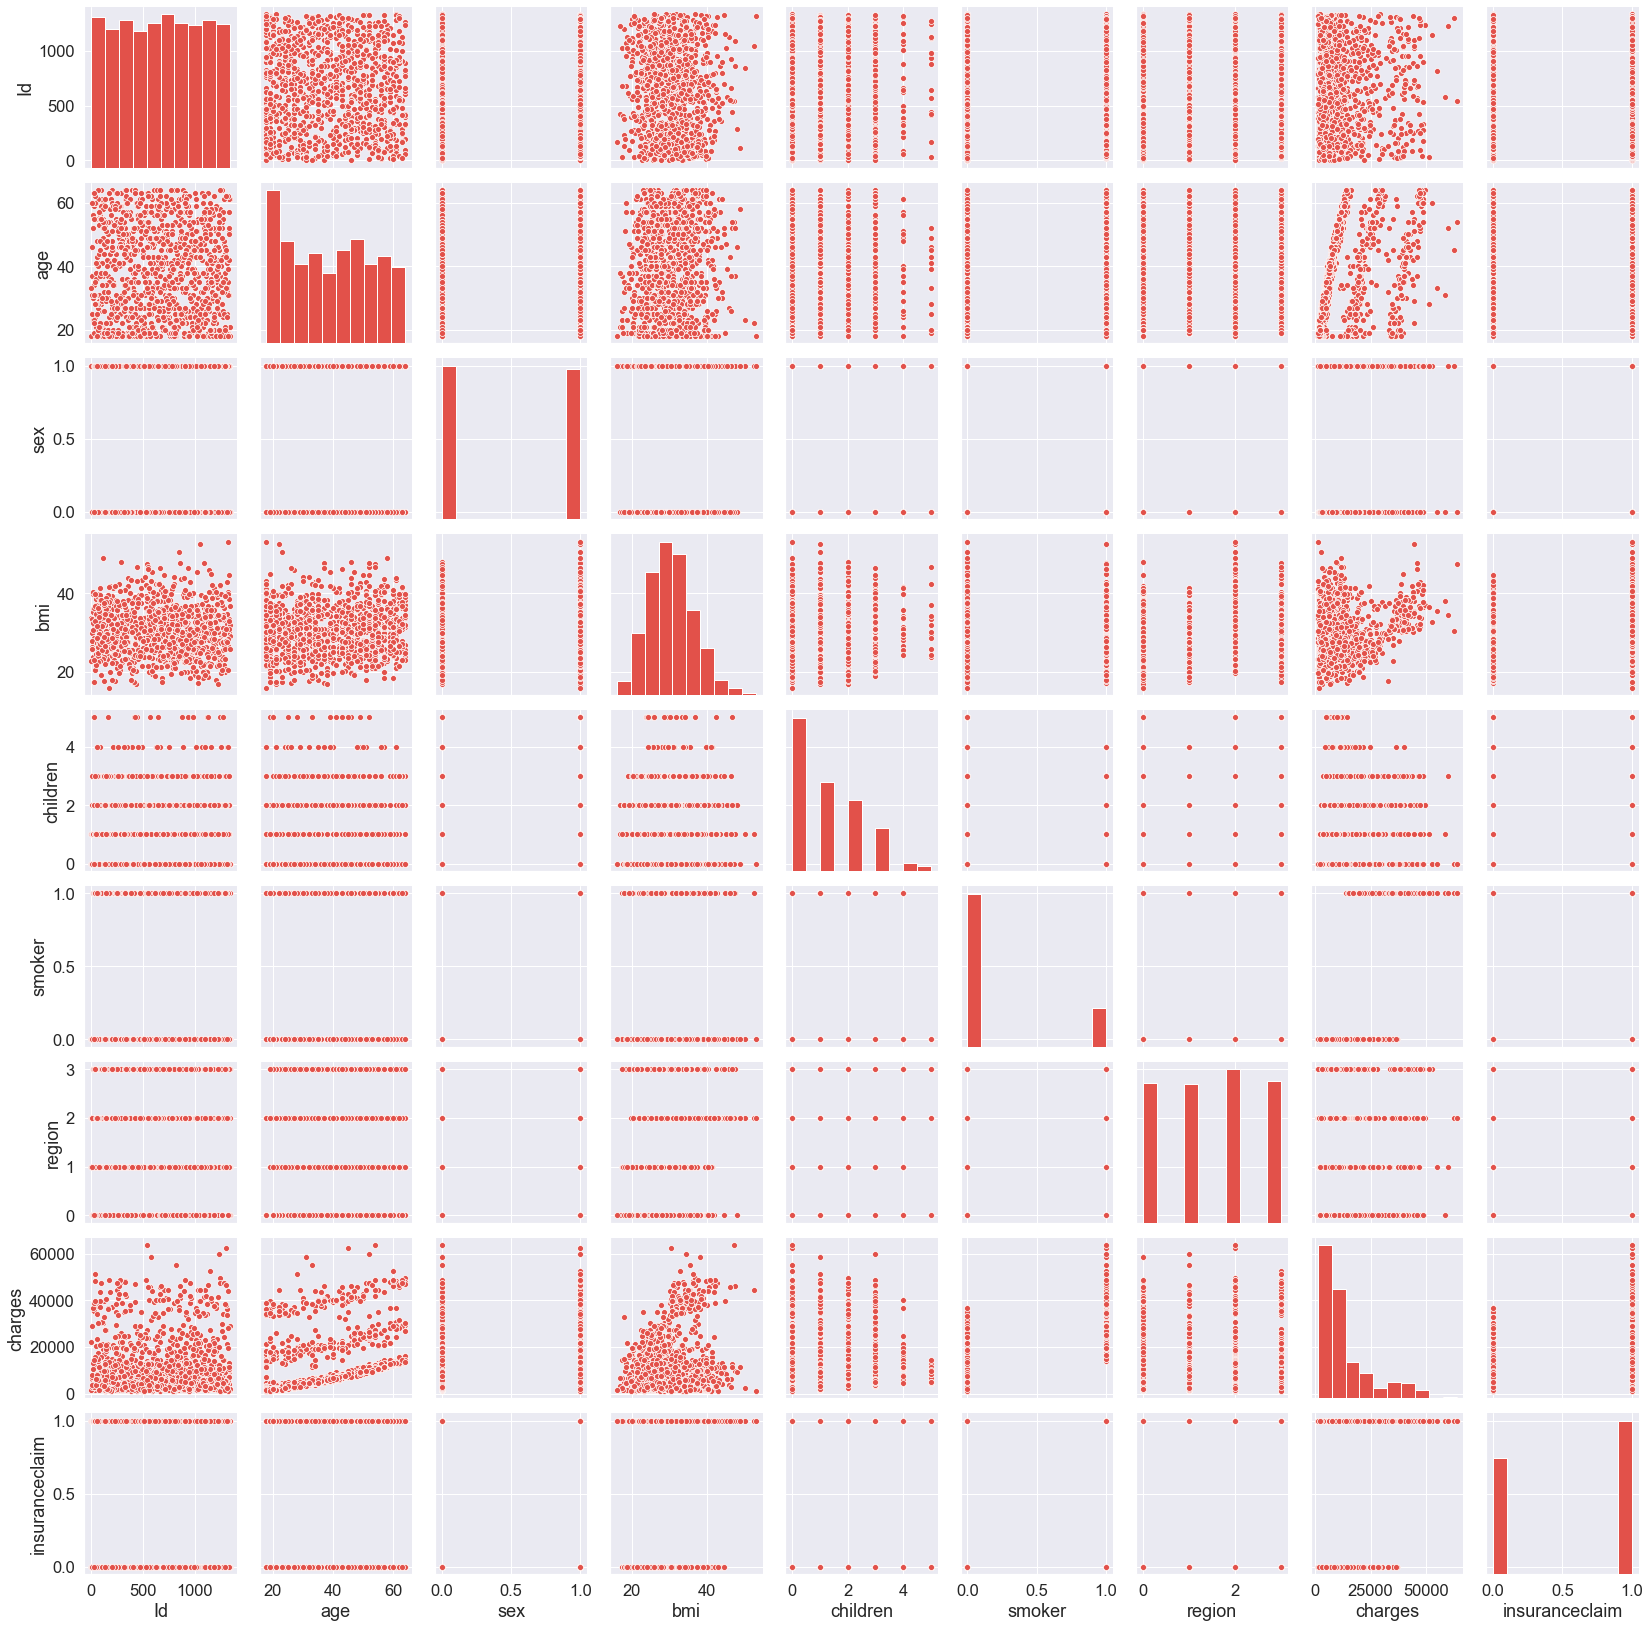

In [16]:
sns.pairplot(data)

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.


In [331]:
# Read data file
data = pd.read_csv('train.csv')

In [332]:
# Features
X = data[['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

# Target 
y = data[['insuranceclaim']]

In [333]:
# Split data into train and test
X_train,X_val,y_train,y_val=train_test_split(X,y ,test_size=0.3,random_state=8)

In [334]:
X_train.shape

(749, 8)

In [335]:
columnsToEncode= ['sex', 'smoker', 'region']

In [336]:
# For each categorical column
# We fit a label encoder, transform our column and 
# add it to our new dataframe

label_encoders = {}
df_processed = pd.DataFrame()

for col in columnsToEncode:
    print("Encoding {}".format(col))
    new_le = LabelEncoder()
    df_processed[col] = new_le.fit_transform(X_train[col])
    label_encoders[col] = new_le

#df_processed

cat_columns_idx = [df_processed.columns.get_loc(col) for col in columnsToEncode]

#cat_columns_idx

ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown="ignore")

df_processed_np = ohe.fit_transform(df_processed)
#len(df_processed_np)

enc_df = pd.DataFrame(df_processed_np)
#enc_df

X_train = X_train.join(enc_df)
#X_train

X_train.replace(np.nan,0)

Encoding sex
Encoding smoker
Encoding region


,Id,age,sex,bmi,children,smoker,region,charges,0,1,2,3,4,5,6,7
57,822,18,0,31.130,0,0,2,1621.88270,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
875,1128,34,1,32.800,1,0,3,14358.36437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,395,46,1,19.855,0,0,1,7526.70645,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
993,36,62,0,32.965,3,0,1,15612.19335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
652,281,54,1,40.565,3,1,0,48549.17835,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,294,25,1,26.800,3,0,3,3906.12700,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
986,802,21,1,22.300,1,0,3,2103.08000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,230,42,0,36.195,1,0,1,7443.64305,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
361,844,53,1,30.495,0,0,0,10072.05505,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [337]:
# For each categorical column
# We fit a label encoder, transform our column and 
# add it to our new dataframe

label_encoders = {}
df_processed = pd.DataFrame()

for col in columnsToEncode:
    print("Encoding {}".format(col))
    new_le = LabelEncoder()
    df_processed[col] = new_le.fit_transform(X_val[col])
    label_encoders[col] = new_le

#df_processed

cat_columns_idx = []
cat_columns_idx = [df_processed.columns.get_loc(col) for col in columnsToEncode]

#cat_columns_idx

ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown="ignore")

df_processed_np = ohe.fit_transform(df_processed)
#len(df_processed_np)

enc_df = pd.DataFrame(df_processed_np)
#enc_df

X_val = X_val.join(enc_df)
#X_train

X_val.replace(np.nan,0)


Encoding sex
Encoding smoker
Encoding region


,Id,age,sex,bmi,children,smoker,region,charges,0,1,2,3,4,5,6,7
595,1096,51,0,34.960,2,1,0,44641.19740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856,664,64,0,22.990,0,1,2,27037.91410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,198,51,0,18.050,0,0,1,9644.25250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914,1287,36,0,25.900,1,0,3,5472.44900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,793,53,1,20.900,0,1,2,21195.81800,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,1145,52,1,32.775,3,0,1,11289.10925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
952,1317,18,1,53.130,0,0,2,1163.46270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
658,583,32,0,23.650,1,0,2,17626.23951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,1251,19,1,19.800,0,0,3,1241.56500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [338]:
X_train = X_train.drop(columns=columnsToEncode)
X_val = X_val.drop(columns=columnsToEncode)

In [340]:
X_train.isnull()

,Id,age,bmi,children,charges,0,1,2,3,4,5,6,7
57,False,False,False,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,True,True,True,True,True,True,True,True
288,False,False,False,False,False,False,False,False,False,False,False,False,False
993,False,False,False,False,False,True,True,True,True,True,True,True,True
652,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,False,False,False,False,False,False,False,False,False,False,False,False,False
986,False,False,False,False,False,True,True,True,True,True,True,True,True
133,False,False,False,False,False,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False,False,False,False,False,False


In [339]:
# Logistic Model

# Fit the train data
base_model = LogisticRegression()

#print(base_model)
base_model.fit(X_train,y_train)

# Predict
y_pred = base_model.predict(X_val)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [330]:
np.any(np.isnan(X_train))

True

In [43]:
# Measure metrics
print(classification_report(y_val,y_pred))
print(roc_auc_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       128
           1       0.80      0.83      0.82       193

    accuracy                           0.77       321
   macro avg       0.76      0.76      0.76       321
weighted avg       0.77      0.77      0.77       321

0.7569421955958548
[[ 87  41]
 [ 32 161]]


### Regularization

In [44]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
print(C)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

[1.00000000e+00 2.78255940e+00 7.74263683e+00 2.15443469e+01
 5.99484250e+01 1.66810054e+02 4.64158883e+02 1.29154967e+03
 3.59381366e+03 1.00000000e+04]


In [45]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(LogisticRegression(), hyperparameters, cv=10, verbose=1)

In [46]:
# Fit grid search
best_model = clf.fit(X, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.2s finished


In [47]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [48]:
# Predict target vector
y_pred_best = best_model.predict(X_val)

In [49]:
# Measure metrics
print(classification_report(y_val,y_pred_best))
print(roc_auc_score(y_val,y_pred_best))
print(confusion_matrix(y_val,y_pred_best))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       128
           1       0.80      0.84      0.82       193

    accuracy                           0.78       321
   macro avg       0.77      0.76      0.77       321
weighted avg       0.78      0.78      0.78       321

0.7634391191709844
[[ 88  40]
 [ 31 162]]


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

{'d', 'a'}
